<a href="https://colab.research.google.com/github/xxueewa/colab_projects/blob/main/Social_Media_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Social Media Data Analysis
### Dataset

The Social Media Sentiments Analysis Dataset captures a vibrant tapestry of emotions, trends, and interactions across various social media platforms. This dataset provides a snapshot of user-generated content, encompassing text, timestamps, hashtags, countries, likes, and retweets. Each entry unveils unique stories—moments of surprise, excitement, admiration, thrill, contentment. \\
Dataset Link: https://www.kaggle.com/datasets/kashishparmar02/social-media-sentiments-analysis-dataset

In [285]:
import pandas as pd
df = pd.read_csv("sentimentdataset.csv")
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [5]:
df.shape

(732, 15)

In [286]:
df = df.iloc[:, 3:]
df['Platform'] = df['Platform'].astype(pd.StringDtype())
df.dtypes

Sentiment     object
Timestamp     object
User          object
Platform      string
Hashtags      object
Retweets     float64
Likes        float64
Country       object
Year           int64
Month          int64
Day            int64
Hour           int64
dtype: object

In [287]:
def preprocessing(platform, origin_df):
    df_specify = origin_df[origin_df['Platform'].str.contains(platform)]
    df_specify['Sentiment'] = df_specify['Sentiment'].apply(lambda x: x.strip() if isinstance(x, str) else x)
    return df_specify

In [ ]:
df_twitter = preprocessing("Twitter", df)
df_instagram = preprocessing("Instagram", df)
df_facebook = preprocessing("Facebook", df)

In [289]:
sentiment_data_list = []
sentiment_data_list.extend(df_twitter['Sentiment'].unique())
sentiment_data_list.extend(df_instagram['Sentiment'].unique())
sentiment_data_list.extend(df_facebook['Sentiment'].unique())

### Data Visualization
Because there are too many distinct values in the sentiments values, such as 'Anger', 'Disgust', 'Admiration' it is hard for visualization and analysis. With the help of pre-trained model from huggingface, we can further classify those sentiments to two classes: 'Positive' and 'Negative'. \\
Model Link: https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english

In [24]:
sentiment_data_list[:10]

['Positive',
 'Negative',
 'Neutral',
 'Anger',
 'Disgust',
 'Love',
 'Admiration',
 'Disappointed',
 'Adoration',
 'Calmness']

In [290]:
!pip install -q transformers
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [301]:
result_mapping = {}
for word in sentiment_data_list:
  result_mapping[word] = sentiment_pipeline(word)[0]['label']
result_mapping

{'Positive': 'POSITIVE',
 'Negative': 'NEGATIVE',
 'Neutral': 'NEGATIVE',
 'Anger': 'NEGATIVE',
 'Disgust': 'NEGATIVE',
 'Love': 'POSITIVE',
 'Admiration': 'POSITIVE',
 'Disappointed': 'NEGATIVE',
 'Adoration': 'POSITIVE',
 'Calmness': 'POSITIVE',
 'Kind': 'POSITIVE',
 'Acceptance': 'POSITIVE',
 'Bitter': 'NEGATIVE',
 'Excitement': 'POSITIVE',
 'Shame': 'NEGATIVE',
 'Elation': 'POSITIVE',
 'Serenity': 'POSITIVE',
 'Empowerment': 'POSITIVE',
 'Arousal': 'POSITIVE',
 'Reverence': 'POSITIVE',
 'Contentment': 'POSITIVE',
 'Hope': 'POSITIVE',
 'Tenderness': 'POSITIVE',
 'Fulfillment': 'POSITIVE',
 'Despair': 'NEGATIVE',
 'Jealousy': 'NEGATIVE',
 'Boredom': 'NEGATIVE',
 'Helplessness': 'NEGATIVE',
 'Loneliness': 'NEGATIVE',
 'Frustration': 'NEGATIVE',
 'Intimidation': 'NEGATIVE',
 'Regret': 'NEGATIVE',
 'Grief': 'NEGATIVE',
 'Resentment': 'NEGATIVE',
 'Curiosity': 'POSITIVE',
 'Numbness': 'NEGATIVE',
 'Ambivalence': 'NEGATIVE',
 'Confusion': 'NEGATIVE',
 'Nostalgia': 'POSITIVE',
 'Determinat

In [302]:
def replaceWord(input_df, result_mapping):
  for idx in input_df.index:
    input_df['Sentiment'][idx] = result_mapping[str(input_df['Sentiment'][idx])]

In [306]:
replaceWord(df_twitter, result_mapping)
df_twitter.head(5)

,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,POSITIVE,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,NEGATIVE,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
5,POSITIVE,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16,9
8,NEGATIVE,2023-01-17 08:00:00,DebateTalk,Twitter,#Politics #Debate,30.0,60.0,USA,2023,1,17,8
11,NEGATIVE,2023-01-18 10:30:00,WellnessCheck,Twitter,#SickDay #Health,7.0,15.0,Canada,2023,1,18,10


In [ ]:
replaceWord(df_instagram, result_mapping)
df_instagram.head(5)

In [ ]:
replaceWord(df_facebook, result_mapping)
df_facebook.head(5)

### Visualization
#### Sentiments Frequency

In [307]:
import matplotlib.pyplot as plt

def plot(df, title):
    plt.hist(df.Sentiment, bins=30, color='skyblue', edgecolor='black')

    # Adding labels and title
    plt.xlabel('Sentiment')
    plt.ylabel('Frequency')
    plt.title('Sentiment Frequency_'+title)

    # Display the plot
    plt.show()

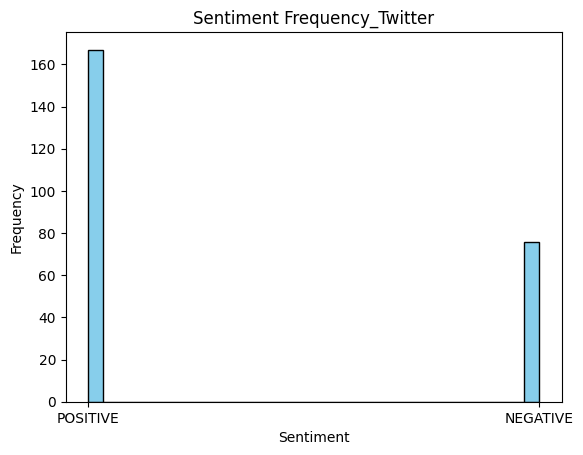

In [308]:
plot(df_twitter, 'Twitter')

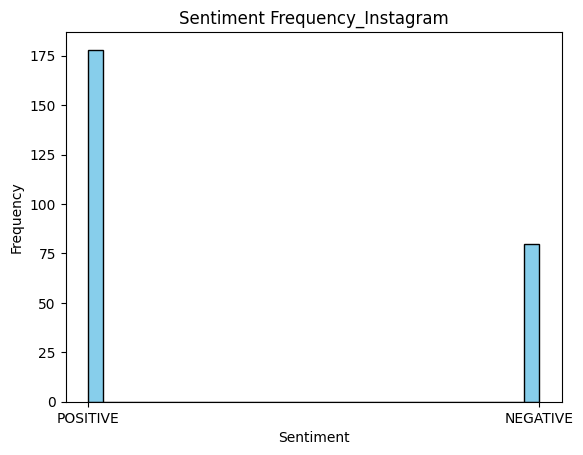

In [ ]:
plot(df_instagram, 'Instagram')

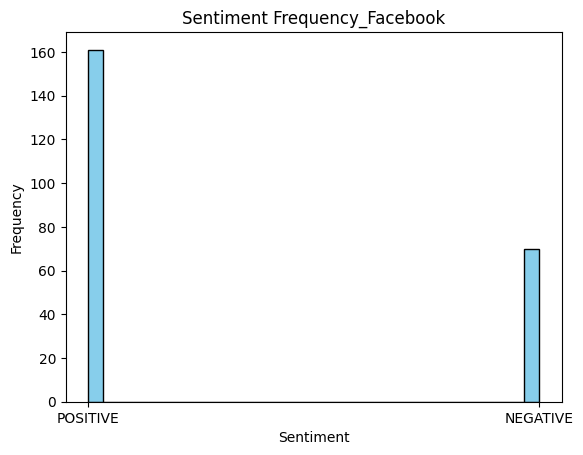

In [ ]:
plot(df_facebook, 'Facebook')

The sentiment histograms of three platforms display a consistent pattern, with a higher number of positive posts across all platforms. The ratio of positive to negative posts is approximately 2:1.


### Sentiments Trend 2010-2023



In [309]:
print(min(df_twitter['Year']))
print(max(df_twitter['Year']))

2010
2023


We can save the proportion in a new column named 'Sentiment_Ratio' to help with the visualization.

In [ ]:
df_twitter.dtypes
df_twitter['Sentiment'] = df_twitter['Sentiment'].astype(pd.StringDtype())
df_instagram['Sentiment'] = df_instagram['Sentiment'].astype(pd.StringDtype())
df_facebook['Sentiment'] = df_facebook['Sentiment'].astype(pd.StringDtype())

In [311]:
def calculate_sentiment_ratio(df):
  df_byyear = df.groupby('Year')['Sentiment'].value_counts().unstack()
  df_byyear.fillna(0)
  df_byyear['Sentiment_Ratio'] = df_byyear['NEGATIVE'] / df_byyear['POSITIVE']
  return df_byyear

df_twitter_byyear = calculate_sentiment_ratio(df_twitter).fillna(0)
df_instagram_byyear = calculate_sentiment_ratio(df_instagram).fillna(0)
df_facebook_byyear = calculate_sentiment_ratio(df_facebook).fillna(0)

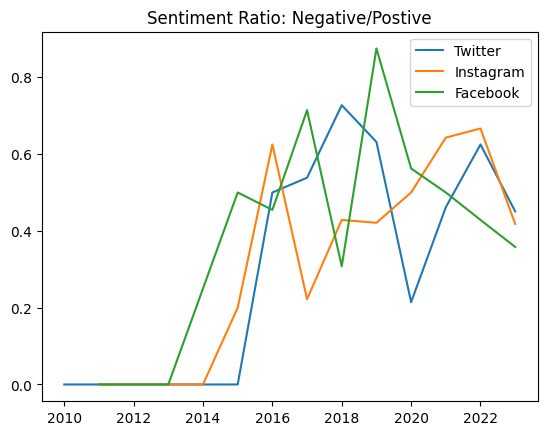

In [312]:
def plotLine(df, title):
  plt.plot(df.index, df['Sentiment_Ratio'])
  plt.title('Sentiment Ratio_'+title)
  plt.show()

titles = ['Twitter', 'Instagram', 'Facebook']
df_list = [df_twitter_byyear, df_instagram_byyear, df_facebook_byyear]
fig, ax = plt.subplots()
for idx in range(0, 3):
  l,=ax.plot(df_list[idx].index, df_list[idx]['Sentiment_Ratio'])
  l.set_label(titles[idx])
  ax.set_title('Sentiment Ratio: Negative/Postive')
  ax.legend()

### Visualization Summary

Summarizing from the above plot, we might need to disregard the ratios from 2010 to 2014 since the zero value could be because of lack of data. From 2016 to 2023, the data seems to hold more significance. Instagram users demonstrated a lower ratio of negative posts compared to Twitter and Facebook users, who exhibited higher ratios of such content. Facebook's negative posts ratio reached to a peak in 2019. From 2022 onwards, there has been a marked reduction in the ratio of negative posts, suggesting an improvement in the social media environment and a growing positivity in people's attitudes towards their lives.

Analyzing social media posts offers the opportunity to track changes in public emotions over time, enabling us to take appropriate measures to foster a more positive social environment.

So far we analyzed the sentiments across different time periods, but there are additional dimensions like region, post datetime which could be further explored.

### Predicting Social Media Performance Metrics

A data mining approach typically includes phases such as data
understanding, data preparation, modeling, and evaluation. The original dataset has the features as:
*   Text
*   Sentiment
*   Timestamp
*   User
*   Platform
*   Hashtags
*   Retweets
*   Likes
*   Country
*   Year
*   Month
*   Day
*   Hour \\

The text and Timestamp of each record might be distinct and not suitable for modeling, therefore I disregarded these two columns. 'Day of week' is a typical feature affecting the performance of posts, I converted the days to weekday. There are several categorical variables including 'Sentiment', 'Platform', 'Country', 'Hashtag', SVM are unable to be applied directly since the model is based on the Euclidean distances. We could use dummy variables to represent the categorical variables. \\

Input Features: Sentiment, Platform, Retweets, Country, Year, Month, Weekday, Hour, Hashtags \\
Output Feature: Likes \\

Reference: Predicting social media performance metrics and evaluation of the impact on brand building: A data mining approach (Sérgio Moro a,b,⁎, Paulo Rita a, Bernardo Vala)


In [20]:
import pandas as pd
df2 = pd.read_csv("sentimentdataset.csv")
df2.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [21]:
df2['Weekday'] = pd.to_datetime(df2['Timestamp']).dt.dayofweek

In [22]:
df2['Hashtags'] = df2['Hashtags'].apply(lambda x: x[2:])
df2[['Hashtags_1', 'Hashtags_2']] = df2['Hashtags'].str.split(' #', n=1, expand=True)
df2.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Weekday,Hashtags_1,Hashtags_2
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,Nature #Park,15.0,30.0,USA,2023,1,15,12,6,Nature,Park
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,6,Traffic,Morning
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,Fitness #Workout,20.0,40.0,USA,2023,1,15,15,6,Fitness,Workout
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,Travel #Adventure,8.0,15.0,UK,2023,1,15,18,6,Travel,Adventure
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,Cooking #Food,12.0,25.0,Australia,2023,1,15,19,6,Cooking,Food


In [23]:
df2 = df2[['Sentiment','Platform','Retweets','Likes','Country','Year','Month','Weekday','Hour','Hashtags_1', 'Hashtags_2']]

In [24]:
df2['Country'] = df2['Country'].str.strip()
df2['Sentiment'] = df2['Sentiment'].str.strip()
df2['Platform'] = df2['Platform'].str.strip()

In [25]:
# prompt: convert 'Sentiment', 'Plarform', 'Hashtags_1', 'Hashtags_2', 'Country', 'Day' to dummy variables
df2 = pd.get_dummies(df2, columns=['Sentiment','Platform','Country','Hashtags_1', 'Hashtags_2'])

In [26]:
df2.columns

Index(['Retweets', 'Likes', 'Year', 'Month', 'Weekday', 'Hour',
       'Sentiment_Acceptance', 'Sentiment_Accomplishment',
       'Sentiment_Admiration', 'Sentiment_Adoration',
       ...
       'Hashtags_2_WonderfulMoment ', 'Hashtags_2_WorkFromHome           ',
       'Hashtags_2_Workout                        ',
       'Hashtags_2_Workshop                  ', 'Hashtags_2_WorldCupTriumph ',
       'Hashtags_2_Worry                               ',
       'Hashtags_2_WoundedHeart              ',
       'Hashtags_2_YearbookMemories            ',
       'Hashtags_2_YearningForConnection         ', 'Hashtags_2_ZenWisdom '],
      dtype='object', length=1275)

In [ ]:
df2.dropna()

In [51]:
X = df2.drop(['Likes'],axis=1)
y = df2[['Likes']]

#### SelectKBest
SelectKBest scores the features based on statistical tests
like chi-squared test, etc. We can use this in the preprossing step to visualize the ranking of features. \\
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [52]:
from sklearn.feature_selection import SelectKBest, chi2
fs = SelectKBest(score_func=chi2, k = 1000) # We can select the top k features if set the value here
X_new = fs.fit_transform(X, y)
X_new.shape

(732, 1000)

In [ ]:
fs.get_feature_names_out()

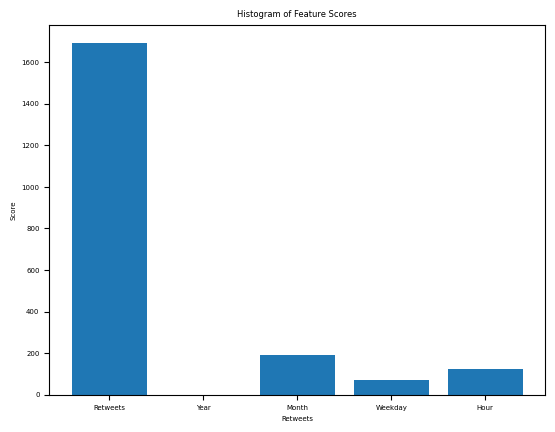

In [55]:
import matplotlib.pyplot as plt
import numpy as np

result=[]
for i in range(5):
  result.append([X.columns[i], fs.scores_[i]])

plt.rcParams.update({'font.size': 5})

a = np.array([r[0] for r in result])
b = np.array([r[1] for r in result])

plt.bar(a[:5], b[:5])
plt.xlabel(result[0][0])
plt.ylabel("Score")
plt.title("Histogram of Feature Scores")
plt.show()



From above plot, 'Year' does not affect too much on the posts performance. The 'Month' and 'Weekday' to do the posting are typical aspects to consider about when posting the content. And the number of retweets significantly increased the number of 'Likes'. After selecting the k-Best-feature, 'Year' column has been dropped after the transformation.


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [68]:
X_test = pd.DataFrame(X_test)

In [ ]:
from sklearn import svm
model = svm.SVR(kernel='linear')
model.fit(X_train, y_train)

In [81]:
accuracy = model.score(X_test, y_test)
accuracy

0.9976628112765115

The accuracy of the model reachs to 0.99, and we can also cross validate several test inputs as the following.

In [82]:
import numpy as np
for i in np.random.randint(1, len(X_test), size=10):
  print(model.predict(X_test.iloc[i-1:i, :]))
  print(y_test.iloc[i-1:i, :])

[59.92430479]
     Likes
338   60.0
[80.31563532]
     Likes
470   80.0
[44.40121902]
     Likes
457   45.0
[60.10005728]
     Likes
405   60.0
[50.65698434]
     Likes
244   50.0
[60.35381198]
     Likes
351   60.0
[29.94189742]
     Likes
319   30.0
[69.48539783]
     Likes
625   70.0
[20.06292306]
     Likes
165   20.0
[44.22850228]
     Likes
668   45.0
